# Notebook Context

## Question:
<font size="5">
What is the difference in performance between the classic UNet trained on polar data representation and the classic UNet trained on carthesian data representation?
</font>

## Answer:
<font size="5">
For the classic UNet architecture, training on polar transformation of the data yields a bump in performance of approximately 10% compared to the training performed on the carthesian representation of the data.
</font>


In [2]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from pprint import pprint

# %matplotlib widget

In [3]:
def load_experiment_config(experiment_config_path):
    experiment_config = pkl.load(open(experiment_config_path, "rb"))
    pprint(experiment_config)
    return experiment_config

In [4]:
def load_experiment_data(experiment_data_path):
    experiment_history = pd.read_csv(experiment_data_path, header=0)
    pprint(experiment_history.columns)
    return experiment_history

In [5]:
def extract_training_coordinates(experiment_config):
    if "polar_training" not in experiment_config["training_config"].keys():
        training_coodinates = "carthesian"
    elif experiment_config["training_config"]["polar_training"]:
        training_coodinates = "polar"
    else:
        training_coodinates = "carthesian"
    
    return training_coodinates

In [6]:
def plot_train_val_metrics(experiment_config, experiment_data, train_metric_names, val_metric_names):
    
    best_metrics = {}
    plt.figure(figsize=(10, 7))
    
    for train_metric_name, val_metric_name in zip(train_metric_names, val_metric_names):
        plt.plot(experiment_data[train_metric_name], label=train_metric_name)
        plt.plot(experiment_data[val_metric_name], label=val_metric_name)
        best_metrics[train_metric_name] = np.round(experiment_data[train_metric_name].max(), 4)
        best_metrics[val_metric_name] = np.round(experiment_data[val_metric_name].max(), 4)

    training_coordinates = extract_training_coordinates(experiment_config)
    
    plt.grid("on")
    start, end = plt.ylim()
    plt.yticks(np.arange(start, end, step=0.02))
    plt.title(f"Model: {experiment_config['model_config']['model']} Transformation: {training_coordinates}")
    plt.xlabel("Training Epochs")
    plt.ylabel("Metric Mangitude")
    plt.legend()
    plt.show()

In [25]:
def plot_cross_experiments_metrics(experiment_configs, experiments_data, metric_names):
    
    plt.figure(figsize=(10, 7))
    
    for metric_name in metric_names:
        for experiment_config, experiment_data in zip(experiment_configs, experiments_data):
            training_coordinates = extract_training_coordinates(experiment_config)
            plt.plot(experiment_data[metric_name], label=f"{metric_name} - {experiment_config['model_config']['model']} - {training_coordinates}")
    
    plt.grid("on")
    start, end = plt.ylim()
    plt.yticks(np.arange(start, end, step=0.02))
    plt.title(f"Cross-Model Comparison")
    plt.xlabel("Training Epochs")
    plt.ylabel("Metric Mangitude")
    plt.legend(ncol=2)
    plt.show()

In [73]:
def plot_cross_experiments_test_metrics(experiment_configs, experiments_data, metric_names, legend_columns=2):
    
    plt.figure(figsize=(12, 7))
    for metric_name in metric_names:
        for experiment_config, experiment_data in zip(experiment_configs, experiments_data):
            training_coordinates = extract_training_coordinates(experiment_config)
            plt.plot(experiment_data[metric_name], label=f"{metric_name} - {experiment_config['model_config']['model']} - {training_coordinates}")

    plt.grid("on")
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xticks(np.arange(14), experiments_data[0]["volume"], rotation=45)
    plt.title(f"Cross-Model Comparison")
    plt.xlabel("Test Volume")
    plt.ylabel("Metric Mangitude")
    plt.legend(ncol=legend_columns)
    plt.show()

# Lesion Segmentation Training Performance

## Investigate training performance of liver tumor segmentation for a classic UNet model

In [8]:
POLAR_EXPERIMENT_ROOT_PATH = "../experiments_data/set_3/lesion/experiment_6/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
polar_experiment_config = load_experiment_config(os.path.join(POLAR_EXPERIMENT_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
polar_experiment_history = load_experiment_data(os.path.join(POLAR_EXPERIMENT_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model': 'classic_unet',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
       

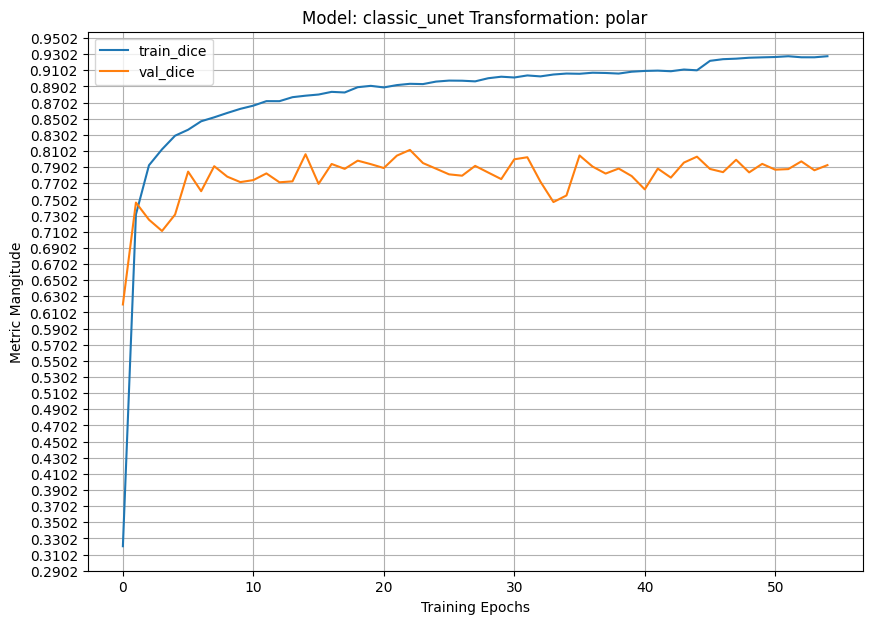

In [9]:
plot_train_val_metrics(
    experiment_config=polar_experiment_config,
    experiment_data = polar_experiment_history,
    train_metric_names=["train_dice"],
    val_metric_names=["val_dice"]
)

## Cross Experiments

<font size="5">
Compare performance of model training on carthesian coordinates vs model training on polar coordinates
</font>

In [10]:
CARTHESIAN_EXPERIMENT_ROOT_PATH = "../experiments_data/set_3/lesion/experiment_7/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
carthesian_experiment_config = load_experiment_config(os.path.join(CARTHESIAN_EXPERIMENT_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
carthesian_experiment_history = load_experiment_data(os.path.join(CARTHESIAN_EXPERIMENT_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model': 'classic_unet',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
       

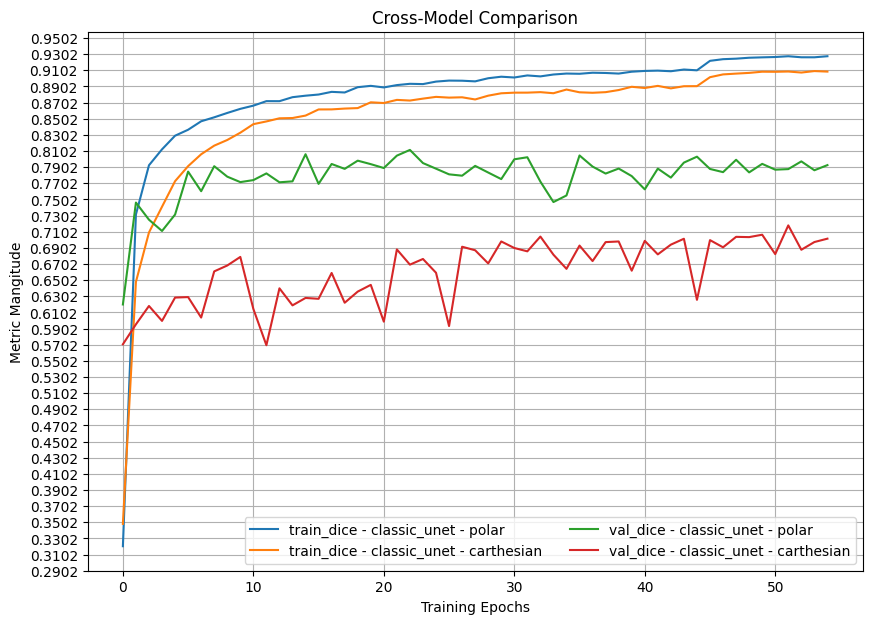

In [11]:
plot_cross_experiments_metrics(
    experiment_configs=[polar_experiment_config, carthesian_experiment_config],
    experiments_data=[polar_experiment_history, carthesian_experiment_history],
    metric_names=["train_dice", "val_dice"]
    )

# Lesion Segmentation Test Performance

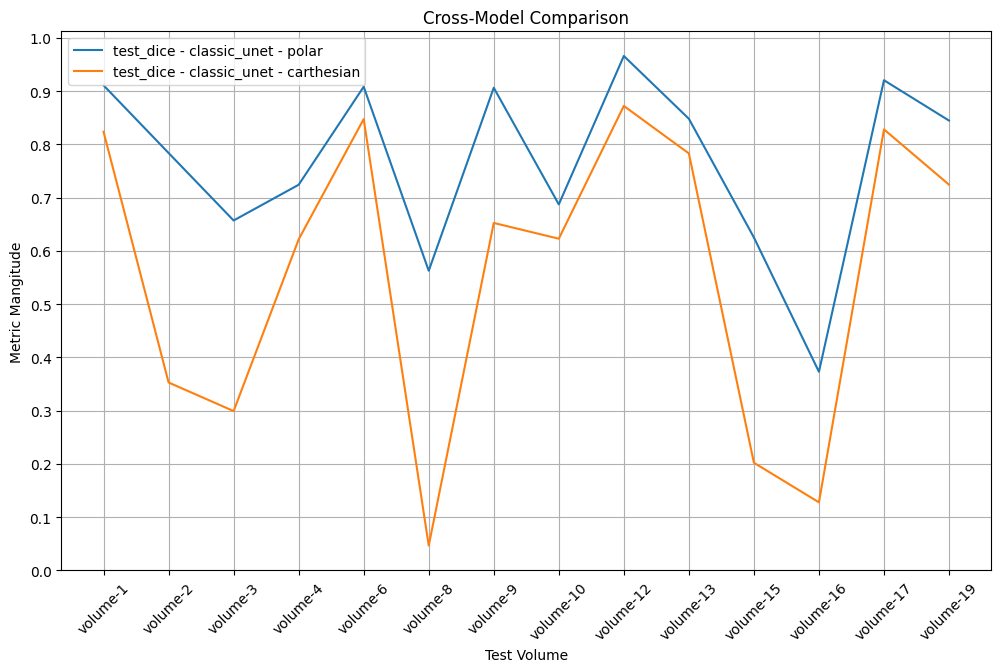

In [74]:
TEST_RESULTS_DIRNAME = "test_results"
TEST_METRICS_FILENAME = "test_metrics.csv"

carthesian_test_metrics = pd.read_csv(os.path.join(CARTHESIAN_EXPERIMENT_ROOT_PATH, TEST_RESULTS_DIRNAME, TEST_METRICS_FILENAME), header=0)
polar_test_metrics = pd.read_csv(os.path.join(POLAR_EXPERIMENT_ROOT_PATH, TEST_RESULTS_DIRNAME, TEST_METRICS_FILENAME), header=0)

plot_cross_experiments_test_metrics(
    experiment_configs=[polar_experiment_config, carthesian_experiment_config],
    experiments_data=[carthesian_test_metrics, polar_test_metrics],
    metric_names=["test_dice"],
    legend_columns=1
    )